IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME07: algorithmes d'apprentissage non-supervisé

L'objectif de cette séance est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 8), en particulier, l'algorithme de classification hiérarchique.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

THOIREY Romane - BENCHARA Imane

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>TD-TME07</tt> et rajouter à la suite de <tt>TD-TME07</tt> les noms des membres du binômes séparés par un tiret.


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles :

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un <code>DataFrame</code> que vous avez appris à manipuler dans les séances précédentes.

In [2]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


<font size="+1" color="RED">**[Q]**</font> Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


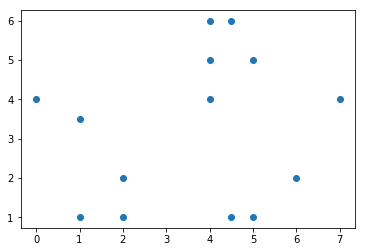

In [3]:
M_data2D= data_2D.as_matrix()      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y) # affichage des points

## Fonctions préliminaires

### Normalisation des données

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend la matrice obtenue en normalisant chaque colonne de ce <code>DataFrame</code> en appliquant la normalisation vue en cours.


In [4]:
def normalisation(df):
    normalised_data = (df - df.min() )/(df.max() - df.min());
    print("Colone X :",df["X"].min(), df["X"].max())
    print("Colone Y :",df["Y"].min(), df["Y"].max())
    return normalised_data.as_matrix()
    

**[Q]** Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

Colone X : 0.0 7.0
Colone Y : 1.0 6.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


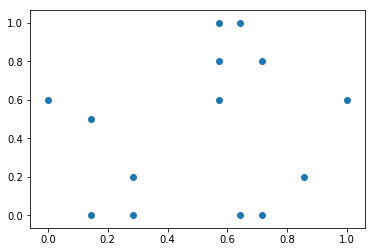

In [5]:
M_data2D= normalisation(data_2D)      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y) # affichage des points

### Distances entre exemples

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_euclidienne_vect</code> qui prend en argument deux exemples sous la forme de vecteurs et rend leur distance euclidienne. 

In [6]:
def dist_euclidienne_vect(v1,v2):
    return np.linalg.norm(v1-v2)
    

In [7]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_manhattan_vect</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [8]:
def dist_manhattan_vect(v1,v2):
    return np.sum(np.abs(v1-v2))

In [9]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance de Manhattan entre v1 et v2 :  0.24285714285714283


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_vect</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [10]:
def dist_vect(s,v1,v2):
    if(s == "euclidienne"):
        return dist_euclidienne_vect(v1,v2)
    else:
        return dist_manhattan_vect(v1,v2)

In [11]:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance  euclidienne  entre v1 et v2 :	 0.17437936593905287
distance  manhattan  entre v1 et v2 :	 0.24285714285714283


### Calcul de centroides

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>centroide</code> qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fait l'hypothèse que la matrice contient toujours au moins un exemple.

In [12]:
def centroide(matrice):
    return np.mean(matrice, axis=0)

In [13]:
M_data2D

array([[0.        , 0.6       ],
       [0.14285714, 0.5       ],
       [0.14285714, 0.        ],
       [0.28571429, 0.        ],
       [0.28571429, 0.2       ],
       [0.57142857, 0.6       ],
       [0.57142857, 0.8       ],
       [0.57142857, 1.        ],
       [0.64285714, 0.        ],
       [0.64285714, 1.        ],
       [0.71428571, 0.        ],
       [0.71428571, 0.8       ],
       [0.85714286, 0.2       ],
       [1.        , 0.6       ]])

In [14]:
centroide(M_data2D)

array([0.51020408, 0.45      ])

In [15]:
centroide([M_data2D[0]])

array([0. , 0.6])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage").

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_groupes</code> qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.


In [16]:
def dist_groupes(s, m1,m2):
    return dist_vect(s,centroide(m1),centroide(m2))

In [17]:
# par exemple :
dist_groupes("euclidienne", M_data2D[0:4], M_data2D[5:13])

0.586345478713841

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>initialise</code> qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrées que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [18]:
def initialise(M):
    res = {}
    for i in range(len(M)):
        res[i]=np.asmatrix(M[i])
    return res

In [19]:
# Par exemple:
depart = initialise(M_data2D)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

{0: matrix([[0. , 0.6]]),
 1: matrix([[0.14285714, 0.5       ]]),
 2: matrix([[0.14285714, 0.        ]]),
 3: matrix([[0.28571429, 0.        ]]),
 4: matrix([[0.28571429, 0.2       ]]),
 5: matrix([[0.57142857, 0.6       ]]),
 6: matrix([[0.57142857, 0.8       ]]),
 7: matrix([[0.57142857, 1.        ]]),
 8: matrix([[0.64285714, 0.        ]]),
 9: matrix([[0.64285714, 1.        ]]),
 10: matrix([[0.71428571, 0.        ]]),
 11: matrix([[0.71428571, 0.8       ]]),
 12: matrix([[0.85714286, 0.2       ]]),
 13: matrix([[1. , 0.6]])}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>fusionne</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [20]:
def fusionne(chaine,cluster):
    
    f1 = 0
    f2 = 0
    dist = 2
    
    for i in cluster.keys():
        for j in cluster.keys():
            if i == j:
                continue
            tmp = dist_groupes(chaine,cluster[i],cluster[j])
            if tmp < dist:
                f1 = i
                f2 = j
                dist = tmp
                
    new_cluster = cluster.copy()
    new_cluster.pop(f1)
    new_cluster.pop(f2)
    new_cluster[max(cluster.keys())+1] = np.concatenate([cluster.get(f1),cluster.get(f2)])
    return new_cluster,f1,f2,dist

In [21]:
# Par exemple:
depart = initialise(M_data2D)
fusionne("euclidienne",depart) 


({0: matrix([[0. , 0.6]]),
  1: matrix([[0.14285714, 0.5       ]]),
  2: matrix([[0.14285714, 0.        ]]),
  3: matrix([[0.28571429, 0.        ]]),
  4: matrix([[0.28571429, 0.2       ]]),
  5: matrix([[0.57142857, 0.6       ]]),
  6: matrix([[0.57142857, 0.8       ]]),
  7: matrix([[0.57142857, 1.        ]]),
  9: matrix([[0.64285714, 1.        ]]),
  11: matrix([[0.71428571, 0.8       ]]),
  12: matrix([[0.85714286, 0.2       ]]),
  13: matrix([[1. , 0.6]]),
  14: matrix([[0.64285714, 0.        ],
          [0.71428571, 0.        ]])},
 8,
 10,
 0.0714285714285714)

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [22]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(M_data2D)       # clustering courant, au départ:s données data_2D normalisées
M_Fusion = []                        # initialisation
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)


La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  2.        ]
 [ 6.         11.          0.14285714  2.        ]
 [ 0.          1.          0.17437937  2.        ]
 [15.         17.          0.20316375  2.        ]
 [ 4.         16.          0.21237241  2.        ]
 [12.         14.          0.26811892  2.        ]
 [19.          5.          0.30474563  2.        ]
 [22.         13.          0.45428571  2.        ]
 [20.         21.          0.5         2.        ]
 [24.         18.          0.63813966  2.        ]
 [25.         23.          0.67968424  2.        ]]


Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

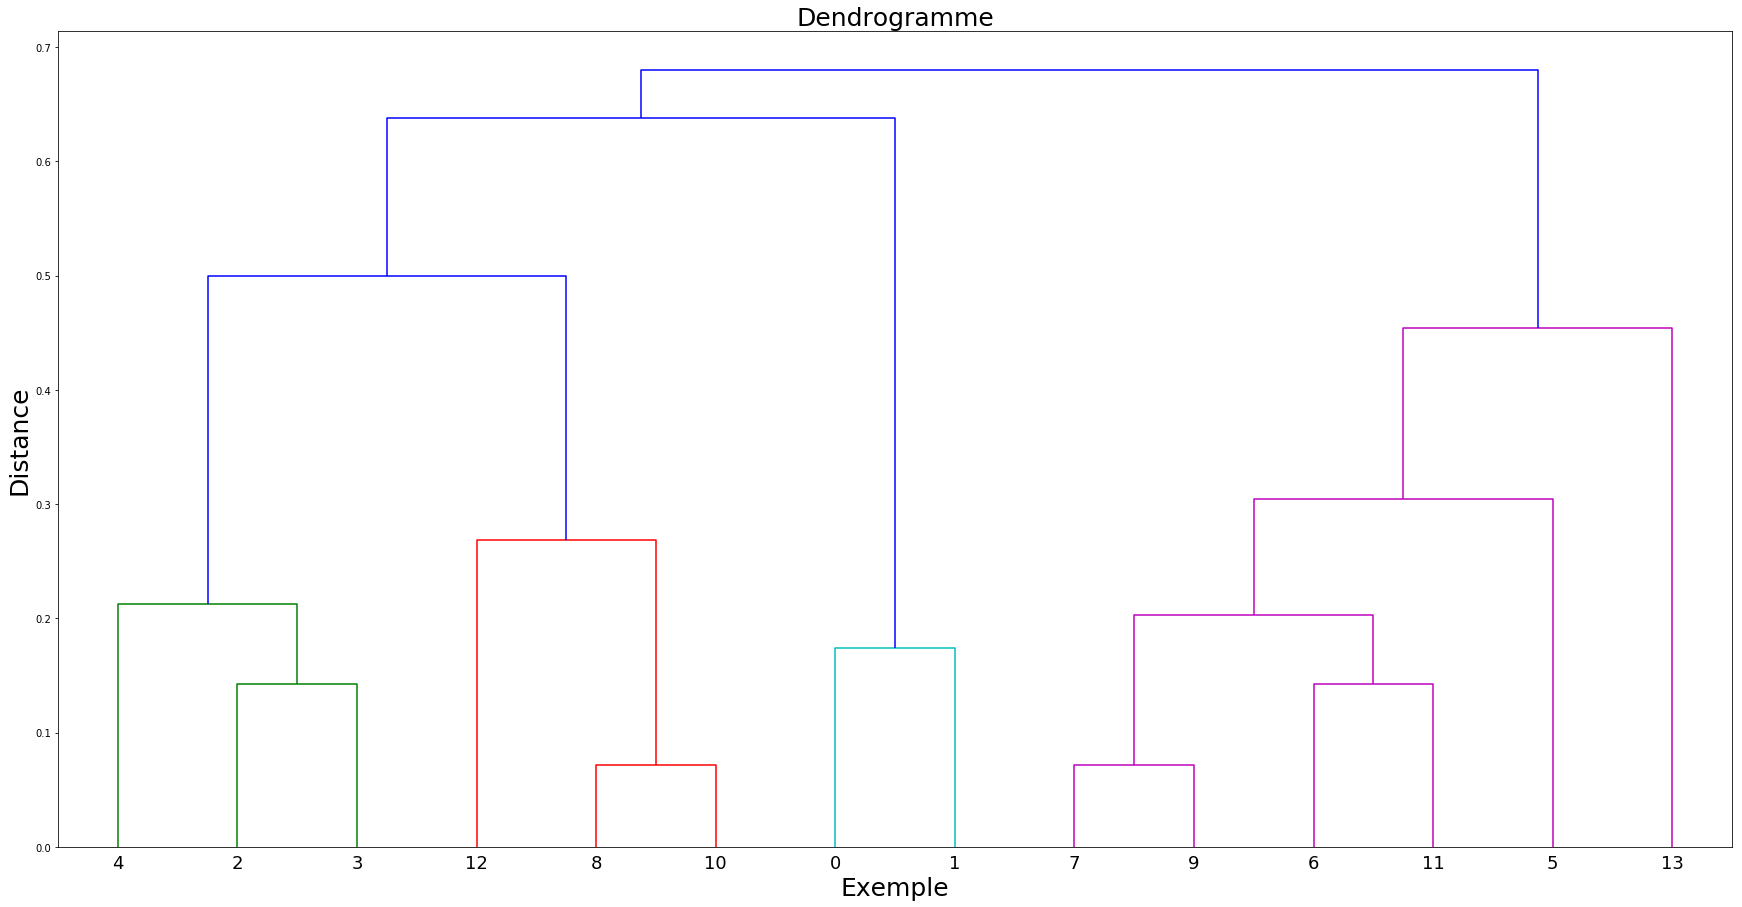

In [23]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel('Exemple', fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
scipy.cluster.hierarchy.dendrogram(
    M_Fusion,
    leaf_font_size=18.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>clustering_hierarchique</code> qui, pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

In [24]:
import scipy.cluster.hierarchy

def clustering_hierarchique(base,distance):
        
    data = pd.read_csv(base)
    M_data = normalisation(data)
    print(M_data)
        # initialisation 
    courant = initialise(M_data)         # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne(distance,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new
    
    print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)
    # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

# Affichage du résultat obtenu:
    plt.show()

### Comparaison de distances

<font size="+1" color="RED">**[Q]**</font> Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance euclidienne. Est-ce que l'utilisation de cette distance vous semble pertinent?

Colone X : 0.0 7.0
Colone Y : 1.0 6.0
[[0.         0.6       ]
 [0.14285714 0.5       ]
 [0.14285714 0.        ]
 [0.28571429 0.        ]
 [0.28571429 0.2       ]
 [0.57142857 0.6       ]
 [0.57142857 0.8       ]
 [0.57142857 1.        ]
 [0.64285714 0.        ]
 [0.64285714 1.        ]
 [0.71428571 0.        ]
 [0.71428571 0.8       ]
 [0.85714286 0.2       ]
 [1.         0.6       ]]

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  2.        ]
 [ 6.         11.          0.14285714  2.        ]
 [15.         17.          0.23571429  2.        ]
 [ 0.          1.          0.24285714  2.        ]
 [ 4.         16.          0.27142857  2.        ]
 [ 5.         18.          0.35357143  2.        ]
 [12.         14.          0.37857143  2.        ]
 [20.         22.          0.5         2.        ]
 [21.         13.          0.62571429  2.        ]
 [24.         19. 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


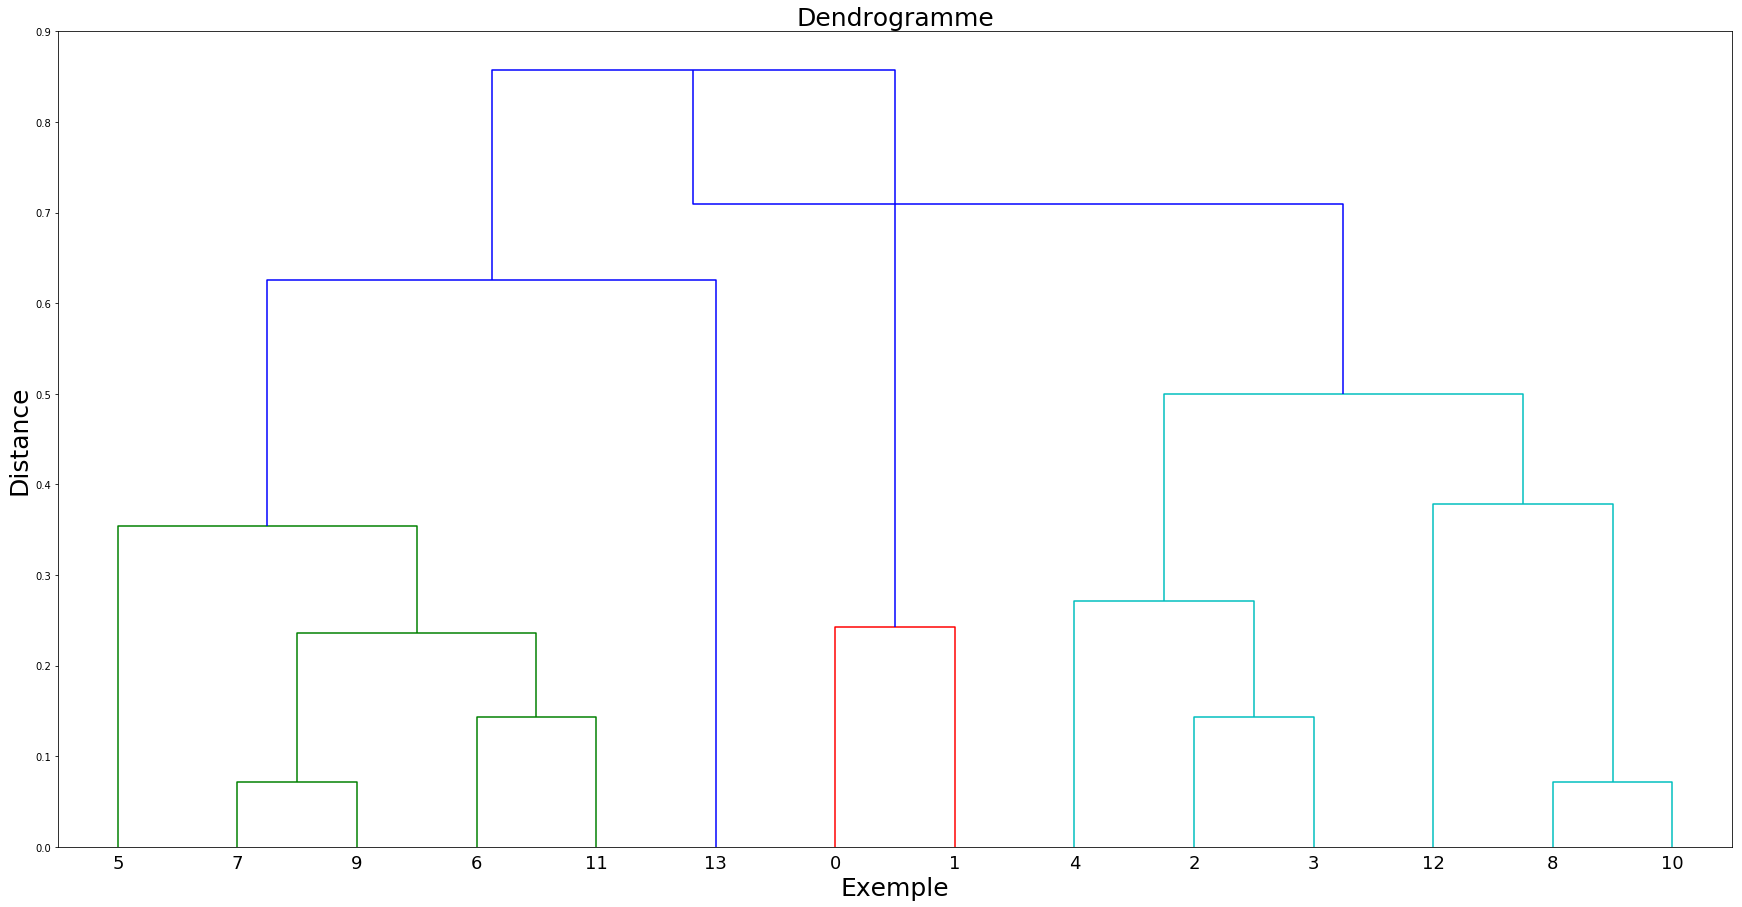

In [25]:
clustering_hierarchique("data/base-2D.csv","manhattan")

Colone X : 0.0 7.0
Colone Y : 1.0 6.0
[[0.         0.6       ]
 [0.14285714 0.5       ]
 [0.14285714 0.        ]
 [0.28571429 0.        ]
 [0.28571429 0.2       ]
 [0.57142857 0.6       ]
 [0.57142857 0.8       ]
 [0.57142857 1.        ]
 [0.64285714 0.        ]
 [0.64285714 1.        ]
 [0.71428571 0.        ]
 [0.71428571 0.8       ]
 [0.85714286 0.2       ]
 [1.         0.6       ]]

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  2.        ]
 [ 6.         11.          0.14285714  2.        ]
 [ 0.          1.          0.17437937  2.        ]
 [15.         17.          0.20316375  2.        ]
 [ 4.         16.          0.21237241  2.        ]
 [12.         14.          0.26811892  2.        ]
 [19.          5.          0.30474563  2.        ]
 [22.         13.          0.45428571  2.        ]
 [20.         21.          0.5         2.        ]
 [24.         18. 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


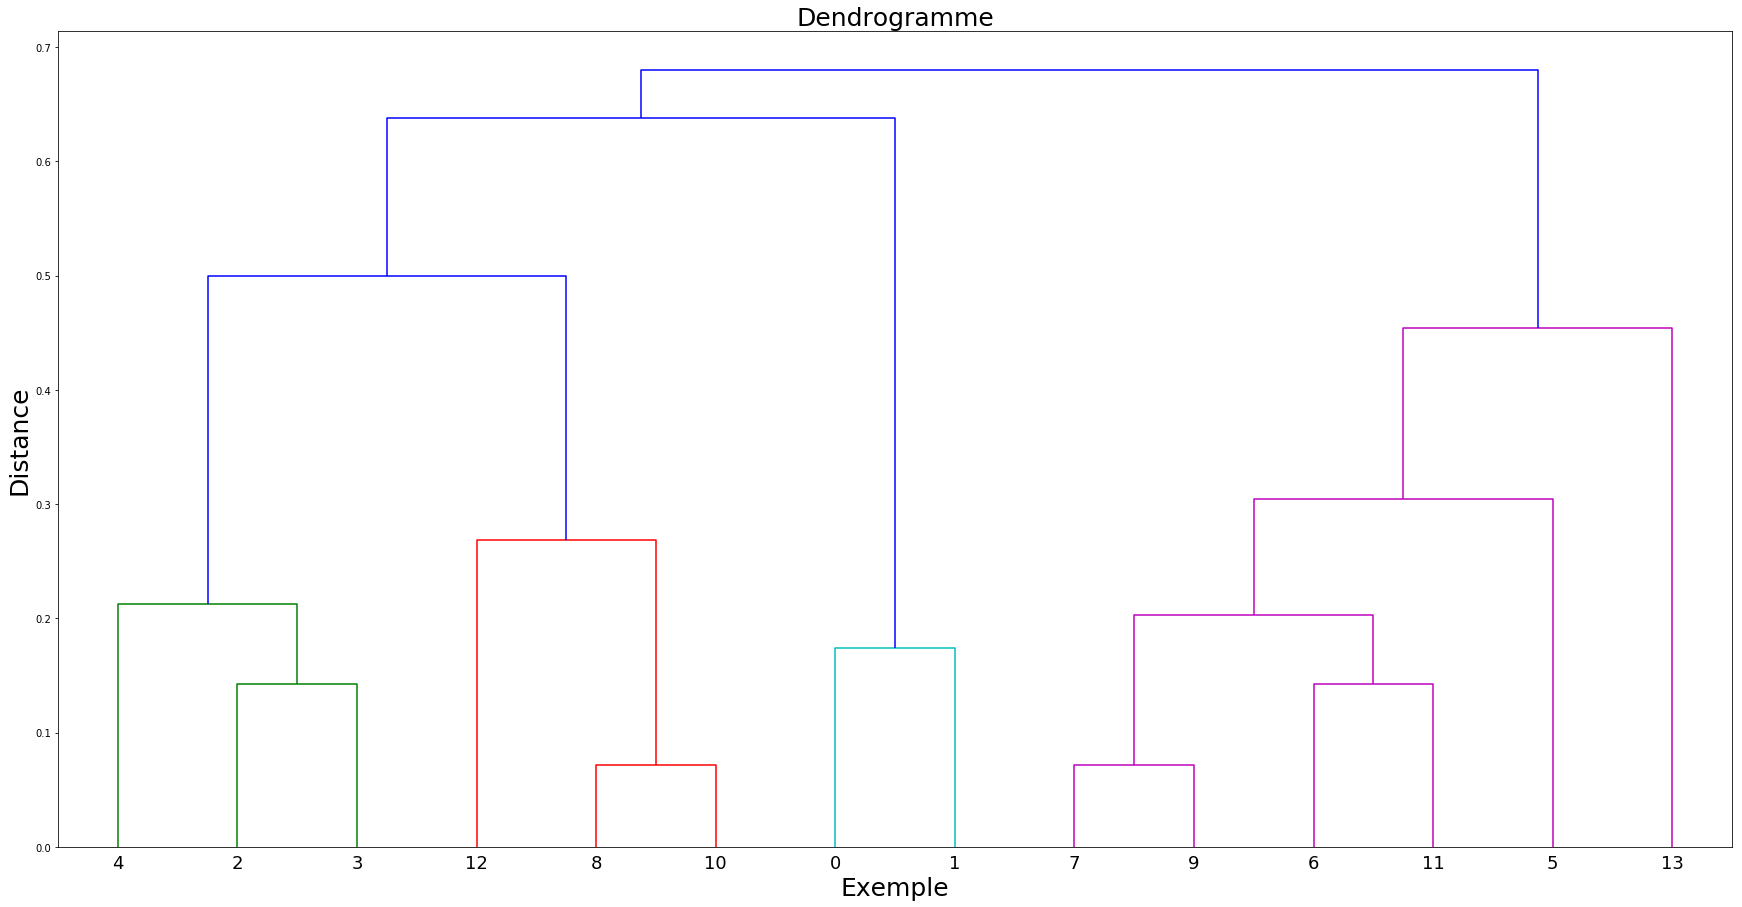

In [26]:
clustering_hierarchique("data/base-2D.csv","euclidienne")

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage". 

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_max_groupes</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [27]:
def dist_max_groupes(distance, cluster1, cluster2):
    distances = list()
    for i in cluster1:
        for j in cluster2:
            distances.append(dist_vect(distance,i,j))
    return max(distances)

In [28]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.118033988749895

La distance <code>dist_max_groupes</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet.

<font size="+1" color="RED">**[Q]**</font> Implémenter une variante du clustering hiérarchique qui utilise cette distance.

In [29]:
def fusionne_C(chaine,cluster):
    
    f1 = 0
    f2 = 0
    dist = 2
    
    for i in cluster.keys():
        for j in cluster.keys():
            if i == j:
                continue
            tmp = dist_groupes(chaine,cluster[i],cluster[j])
            if tmp < dist:
                f1 = i
                f2 = j
                dist = tmp
                
    new_cluster = cluster.copy()
    new_cluster.pop(f1)
    new_cluster.pop(f2)
    new_cluster[max(cluster.keys())+1] = np.concatenate([cluster.get(f1),cluster.get(f2)])
    return new_cluster,f1,f2,dist

def clustering_hierarchique_C(base,distance):
        
    data = pd.read_csv(base)
    M_data = normalisation(data)
        # initialisation 
    courant = initialise(M_data)         # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne_C(distance,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new
    
    print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)
    # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

# Affichage du résultat obtenu:
    plt.show()

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

<font size="+1" color="RED">**[Q]**</font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [32]:
data_Paris = pd.read_csv("data/base-Paris.csv")

In [33]:
data_Paris.head(-1)

,,,,,,,,,,,,Granularité;janv-11;févr-11;mars-11;avr-11;mai-11;juin-11;juil-11;août-11;sept-11;oct-11;nov-11;déc-11;Total arrondissement 2011
75007;288,1;249,1;303,7;255,8;287,8;288,4;249,6;185,6;281,3;284,3;296,4;301,1;
75013;596,5;540,2;618,5;558,6;595,9;581,7;539,2;490,5;597,8;575,7;580,5;601,4;
75014;464;404,9;465,3;420,2;405,3;446;412,9;348,7;449,3;446,3;453,1;484,3;,NaN,NaN
75015;903,1;801,4;937,5;835,5;876,8;888,6;628,8;674,8;913,3;878,7;895,7;935,8;
75017;451,1;412,4;491,6;422,7;363,6;446,4;409,5;332,3;416,4;451,5;475,1;513,5;
75018;427;394,3;455,2;419,9;458,3;456,6;418;361,8;464,6;453,4;478,5;470,9;,NaN,NaN
75019;323,4;287,3;350,3;317,8;336,9;340,7;311,6;281;345,6;335,6;367;354,5;,NaN,NaN
75002;153;125,8;136,6;126,6;133,2;127,6;126,7;114,3;144,3;145,1;129,5;129,8;,NaN
75004;116,3;115,7;133,4;115;123,2;120,5;114,5;97,6;130,5;123;124,3;133,7;,NaN,NaN
75008;252,6;246,7;252,9;232,5;199,4;236,4;175,4;189,4;266,6;230,3;257,7;224,4;


<font size="+1" color="RED">**[Q]**</font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

<font color="RED" size="+1">**[Q]**</font> Montrer que la distance de Manhattan est bien une mesure de distance.

<font color="RED" size="+1">**[Q]**</font> Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.


<font color="RED" size="+1">**[Q]**</font> En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.


<font color="RED" size="+1">**[Q]**</font> *(examen 2018)*
On considère la base d'apprentissage de $[0,10]\times [0,10]$ contenant les 7 exemples suivants: $\mathcal{X}=\{(1,2)$, $(1,4)$, $(3,4)$, $(3,5)$, $(6,2)$, $(6,5)$, $(8,3)\}$ (remarque: cette base est déjà normalisée).
En détaillant les étapes et en expliquant les calculs réalisés et les regroupements effectués, appliquer sur $\mathcal{X}$ l'algorithme de classification hiérarchique, version ascendante, en utilisant l'approche ``centroid linkage'' et la distance euclidienne.  Donner le dendrogramme obtenu.
<font color="RED" size="+1">**[Q]**</font> Si on rajoute l'exemple $(5,5)$ dans $\mathcal{X}$ de la question précédente, sans ré-appliquer l'algorithme donner, en les justifiant, les modifications apportées au dendrogramme précédent par l'ajout de cet exemple.